<a href="https://colab.research.google.com/github/Maryam-Shile/Maryam/blob/master/The_daily_show.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group
Acting            930
Media             751
Politician        308
Comedy            150
Musician          123
Academic          103
Athletics          52
Misc               45
Government         40
Political Aide     36
Science            28
Business           25
Advocacy           24
Consultant         18
Military           16
Clergy              8
media               5
dtype: int64


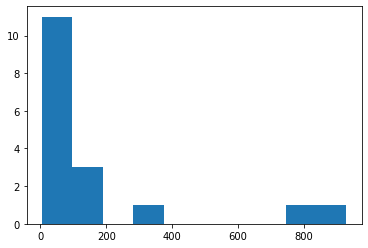

In [ ]:
 % matplotlib inline

 import pandas as pd
 import seaborn as sns
 import matplotlib.pyplot as plt
 df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv', index_col=False)

df.head(10)

#see what data are in group to help me know all the occupations invited

group=df.value_counts(df['Group'])
print(group)

#I need to rename some columns for easy use

df.rename(columns={'YEAR':'Year', 'GoogleKnowledge_Occupation':'Job Role', 'Raw_Guest_List':'Guests'}, inplace=True)
df.head(10)
df.rename(columns={'GoogleKnowledge_Occupation':'Job_Role'}, inplace=True)
df.head(10)

#I will group the occupation into different categories to help me plot better

def occupation (group):
  if group in ['Acting', 'Musician', 'Comedy']:
    return 'Entertainment'
  elif group in ['Media', 'media']:
    return 'Media'
  elif group in ['Government', 'Politician', 'Political Aide']:
    return 'Government'
  else:
    return 'other'
df['Occupation']=df['Group'].apply(occupation)

#I need only the proportion of occupation invited per year, I will get this using pandas cross tab function
ct=pd.crosstab(df['Year'], df['Occupation'], normalize=True)*100

#Note that crosstab has sorted the data based on occupation, I must list out the year column for easy access
year=ct.index.tolist()

#Time to plot
plt.plot(year, ct['Entertainment'], label='Entertainment', linewidth= 3, color='Blue')
plt.plot(year, ct['Government'], label='Government', linewidth= 3, color='Green')
plt.plot(year, ct['Media'], label='Media', linewidth= 3, color='Yellow')
plt.plot(year, ct['other'], label='Other', linewidth= 3, color='Red')
plt.xlabel('Year')
plt.ylabel('Occupation')
plt.legend()
plt.show()

#Voila!